./data/2024-05-10_10-31-20.txt
elapsed
121853
N23
121853
N67
121853


interactive(children=(IntSlider(value=0, description='start_index', max=121852), IntSlider(value=121852, descr…

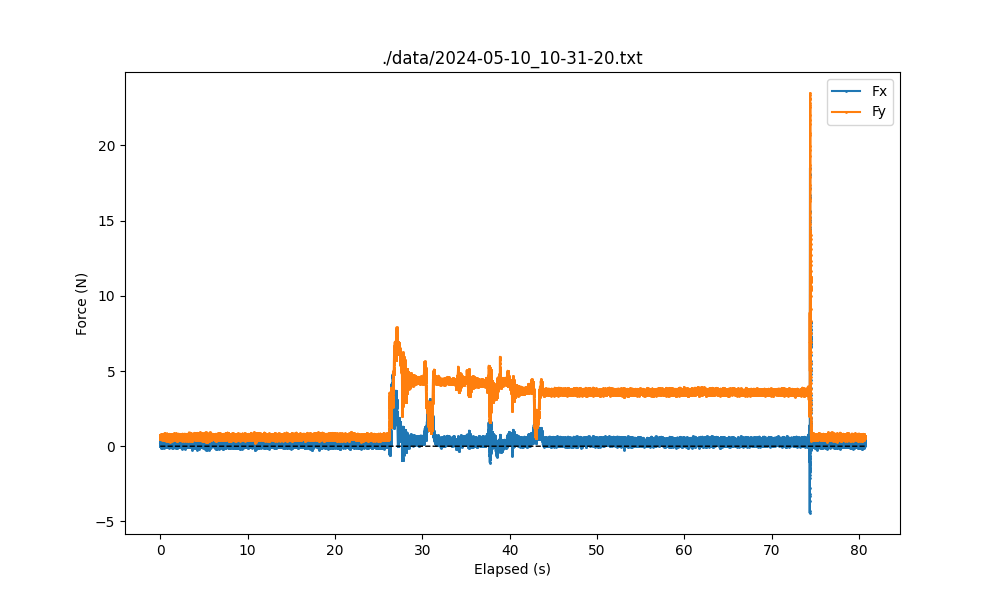

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import glob
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

list_of_files = [f for f in glob.glob('./data/*') if not os.path.isdir(f)] #take all files but not folders
latest_file = max(list_of_files, key=os.path.getctime)

# file_path = latest_file
# file_path = "./data/jumptests1.txt"
file_path = "./data/" + "2024-05-10_10-31-20.txt"
print(file_path)

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

labels = [
    'elapsed',
    'N23', 
    'N67', 
]
data_dict = {label: [] for label in labels}

last_delimiter_index = 0

messages = []
for i in range(len(lines)):
    if(lines[i].startswith('\n')):
        messages.append(lines[last_delimiter_index:i])
        last_delimiter_index = i
        # print("found ", i)

for message in messages:
    # print("message")
    # message_dict = dict.fromkeys(labels, [])
    message_dict = {label: [] for label in labels}
    for label in labels:
        for line in message:
                if(line.startswith(label)):
                    # print("append ", label, float(line.split(':')[1]))
                    message_dict[label].append(float(line.split(':')[1]))
                    # print(message_dict[label])
    # print(message_dict)
    full = True
    for key in message_dict:
        if(len(message_dict[key]) == 0):
            # print(message_dict)
            full=False
            break
    if(full):
        for label in labels:
            # print((message_dict[label]))
            data_dict[label].append(message_dict[label][0])
    
    # if(len)


for series in data_dict:
    print(series)
    print(len(data_dict[series]))

# Create a dataframe from the extracted values
df_raw = pd.DataFrame(data_dict)
df = None #cropped version

plt.close('all')

# print(len(df[f'N23']))

# plt.figure()
# plt.plot(df_raw['elapsed'], df_raw['force'], marker='.')

fig, ax = plt.subplots(1, 1, figsize=(10,6))
@interact(start_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=0),
          end_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=len(df_raw)-1))
def display_image(start_index, end_index):
    if(start_index >= end_index):
        return

    global df
    df = df_raw[start_index:end_index]

    dt = 0.662
    elapsed = np.arange(0, dt*len(df[f'N23']), dt)/1000
    print(dt*len(df[f'N23']))
    
    ax.clear()
    ax.set_title(file_path)
    ax.set_xlabel('Elapsed (s)')
    ax.set_ylabel('Force (N)')
    # for i in range(2):
    #     ax.plot(df['elapsed'], df[f'dxl_pos[{i}]'], label=f'pos{i}')
    ax.plot(elapsed, -df[f'N23']+0.21, '.-', markersize=2, label=f'Fx')
    ax.plot(elapsed, df[f'N67']+0.62, '.-', markersize=2, label=f'Fy')
    # ax.plot(np.sqrt(df[f'N23']**2 + df[f'N67']**2), '-', label=f'Fnet')
    ax.plot(elapsed, np.zeros_like(df[f'N67']), 'k--', linewidth=1)
    ax.legend()

    average_step_size = df['elapsed'].diff().mean()
    print("Average Step Size:", average_step_size)
plt.show()




In [21]:
elapsed

NameError: name 'elapsed' is not defined